<a href="https://colab.research.google.com/github/martinkim1/2024-1-my-BDA/blob/main/%EA%B3%BC%EC%A0%9C/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import site
import numpy as np
import pandas as pd
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 청년 및 고령자 고용동향 분석

## 과제 주제 선정 이유
현재 한국 사회는 청년층과 고령층의 고용 문제에 직면해 있습니다. 청년층의 높은 실업률과 고령층의 경제활동 참가율 증가는 사회적, 경제적 문제를 야기하고 있습니다. 이러한 문제를 심층적으로 분석함으로써 보다 효과적인 정책을 제안하고자 본 주제를 선정하였습니다.

## 분석 목적
이 과제의 주요 목적은 다음과 같습니다.
- 청년층(15~29세)과 고령층(50세 이상)의 고용률과 실업률 변화를 비교 분석합니다.
- 각 연령대의 경제활동참가율을 분석하여 연령대별 고용 시장의 특성을 파악합니다.
- 고용률과 실업률 간의 상관 관계를 분석하여 고용 시장의 상태를 평가합니다.

## 분석 과정
본 분석은 다음과 같은 과정으로 진행됩니다.
1. **데이터 수집**: 청년 고용동향과 고령자 고용동향에 대한 데이터를 수집하였습니다.
- 통계청 : https://kostat.go.kr/ansk/
- 고용노동부 : https://www.moel.go.kr/index.do
- 중소벤처기업부 : https://www.mss.go.kr/site/smba/main.do

2. **데이터 전처리**: 분석에 필요한 데이터만을 필터링하여 사용하였습니다.

3. **데이터 시각화**: 고용률과 실업률, 경제활동참가율을 막대 그래프를 통해 시각화하였습니다.

4. **상관 관계 분석**: 고용률과 실업률 간의 상관 관계를 분석하여 고용 시장의 특성을 평가하였습니다.


# 데이터 수집
고용률 : https://www.index.go.kr/unity/potal/indicator/IndexInfo.do?cdNo=2&clasCd=10&idxCd=F0105

In [ ]:
df = pd.read_excel('고용률.xlsx')
print(df.head())

   year  15~19  20~29  30~39  40~49  50~59   60~
0  2014    7.7   57.4   74.1   79.1   74.2  39.0
1  2015    7.8   57.9   74.4   79.1   74.4  39.0
2  2016    8.0   58.2   74.7   79.3   74.3  39.5
3  2017    8.4   57.6   75.3   79.4   75.3  39.9
4  2018    7.4   57.9   75.7   79.0   75.2  40.1


#데이터 전처리

In [ ]:
df['청년층'] = df[['15~19', '20~29']].mean(axis=1)
df['중년층'] = df[['30~39', '40~49']].mean(axis=1)
df['장년층'] = df[['50~59', '60~']].mean(axis=1)

print(df[['year', '청년층', '중년층', '장년층']])

   year    청년층    중년층    장년층
0  2014  32.55  76.60  56.60
1  2015  32.85  76.75  56.70
2  2016  33.10  77.00  56.90
3  2017  33.00  77.35  57.60
4  2018  32.65  77.35  57.65
5  2019  32.90  77.20  58.45
6  2020  31.15  76.20  58.35
7  2021  32.40  76.30  59.00
8  2022  34.20  77.70  60.80
9  2023  34.05  78.75  61.60


#데이터 시각화

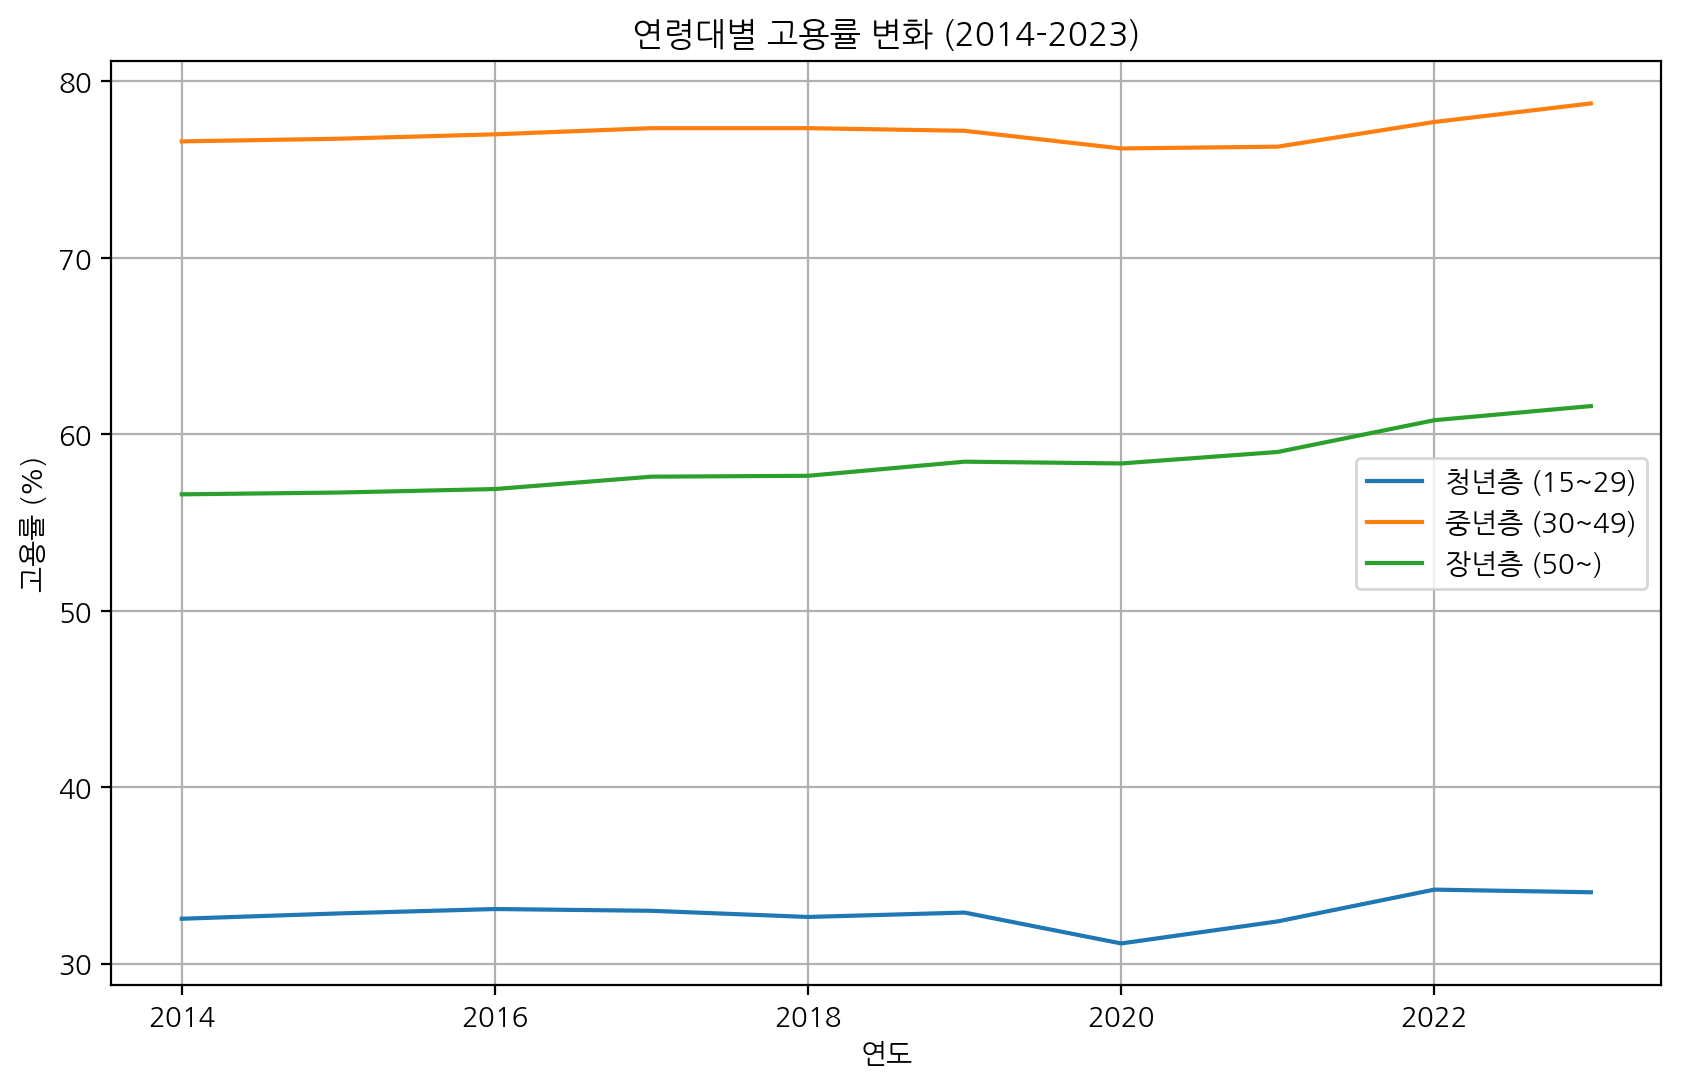

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['청년층'], label='청년층 (15~29)')
plt.plot(df['year'], df['중년층'], label='중년층 (30~49)')
plt.plot(df['year'], df['장년층'], label='장년층 (50~)')

plt.xlabel('연도')
plt.ylabel('고용률 (%)')
plt.title('연령대별 고용률 변화 (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()

#데이터 수집

고령자 고용동향 : https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1496

청년 고용동향 : https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1495

In [ ]:
df = pd.read_excel('청년_고용동향.xlsx')
print(df.head())

   year  생산가능인구  경제활동인구   취업자  실업자  실업률   고용률  경제활동참가율
0  2014    9395    4179  3802  378  9.0  40.5     44.5
1  2015    9380    4253  3864  389  9.1  41.2     45.3
2  2016    9363    4334  3908  426  9.8  41.7     46.3
3  2017    9282    4333  3907  426  9.8  42.1     46.7
4  2018    9149    4312   304  408  9.5  42.7     47.1


In [ ]:
df = pd.read_excel('고령자_고용동향.xlsx')
print(df.head())

   year  경제활동참가율   고용률  실업률
0  2019     68.9  66.9  3.0
1  2020     68.8  66.6  3.3
2  2021     68.6  66.3  3.3
3  2022     70.3  68.8  2.2
4  2023     71.4  69.9  2.1


#데이터 전처리

In [ ]:
df_youth = pd.read_excel('청년_고용동향.xlsx')
df_elderly = pd.read_excel('고령자_고용동향.xlsx')

# 필요한 데이터 필터링
df_youth_filtered = df_youth[df_youth['year'].between(2019, 2023)]
df_elderly_filtered = df_elderly[df_elderly['year'].between(2019, 2023)]

# 데이터 시각화

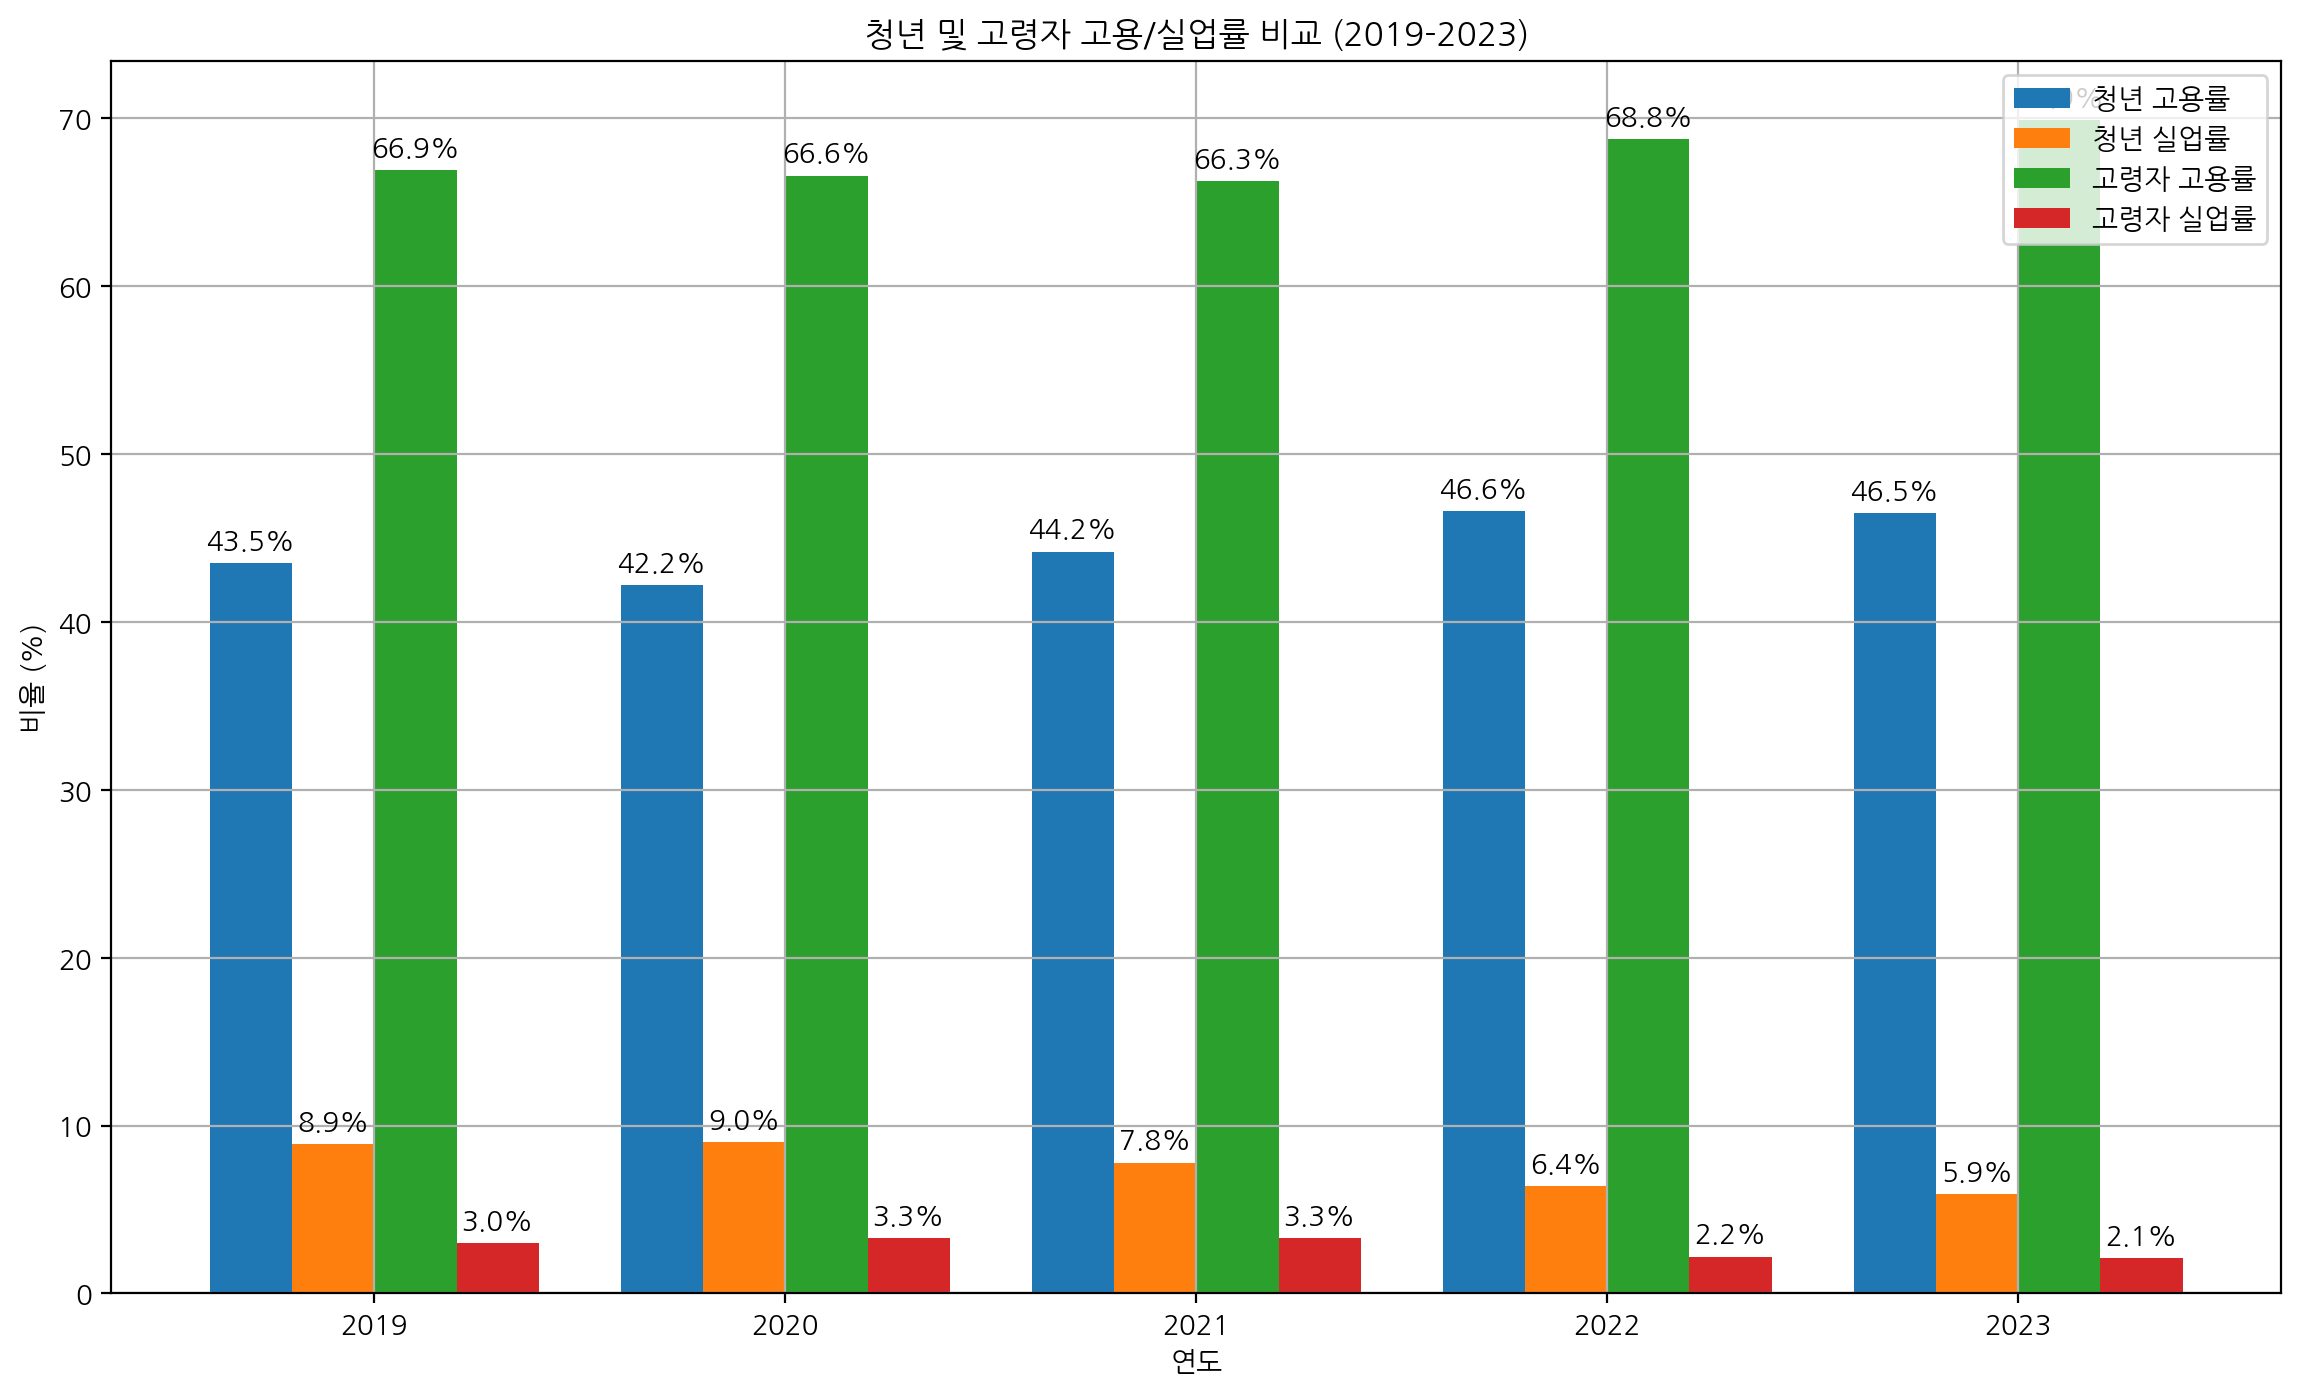

In [ ]:
# 시각화
years = df_youth_filtered['year'].values
bar_width = 0.2  # 막대 너비

fig, ax = plt.subplots(figsize=(14, 8))

# 청년 고용률과 실업률
index = np.arange(len(years))
bar1 = ax.bar(index - 1.5 * bar_width, df_youth_filtered['고용률'], bar_width, label='청년 고용률')
bar2 = ax.bar(index - 0.5 * bar_width, df_youth_filtered['실업률'], bar_width, label='청년 실업률')

# 고령자 고용률과 실업률
bar3 = ax.bar(index + 0.5 * bar_width, df_elderly_filtered['고용률'], bar_width, label='고령자 고용률')
bar4 = ax.bar(index + 1.5 * bar_width, df_elderly_filtered['실업률'], bar_width, label='고령자 실업률')

ax.set_xlabel('연도')
ax.set_ylabel('비율 (%)')
ax.set_title('청년 및 고령자 고용/실업률 비교 (2019-2023)')
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.legend()

# 막대에 값 표시
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

plt.grid(True)
plt.show()


##### 고용률과 실업률 간의 상관 관계 분석을 통해 도출할 수 있는 결론은 다음과 같습니다

일반적으로 고용률이 높을수록 실업률은 낮아지는 부정적 상관 관계가 나타납니다. 이는 경제가 활성화되고 일자리가 많아질 때 고용률이 증가하고 실업률이 감소함을 의미합니다.

고용률과 실업률의 상관 관계를 통해 경제의 건강 상태를 파악하고, 경제 위기나 회복기에 있는지를 이해하는 데 도움을 줄 수 있습니다.

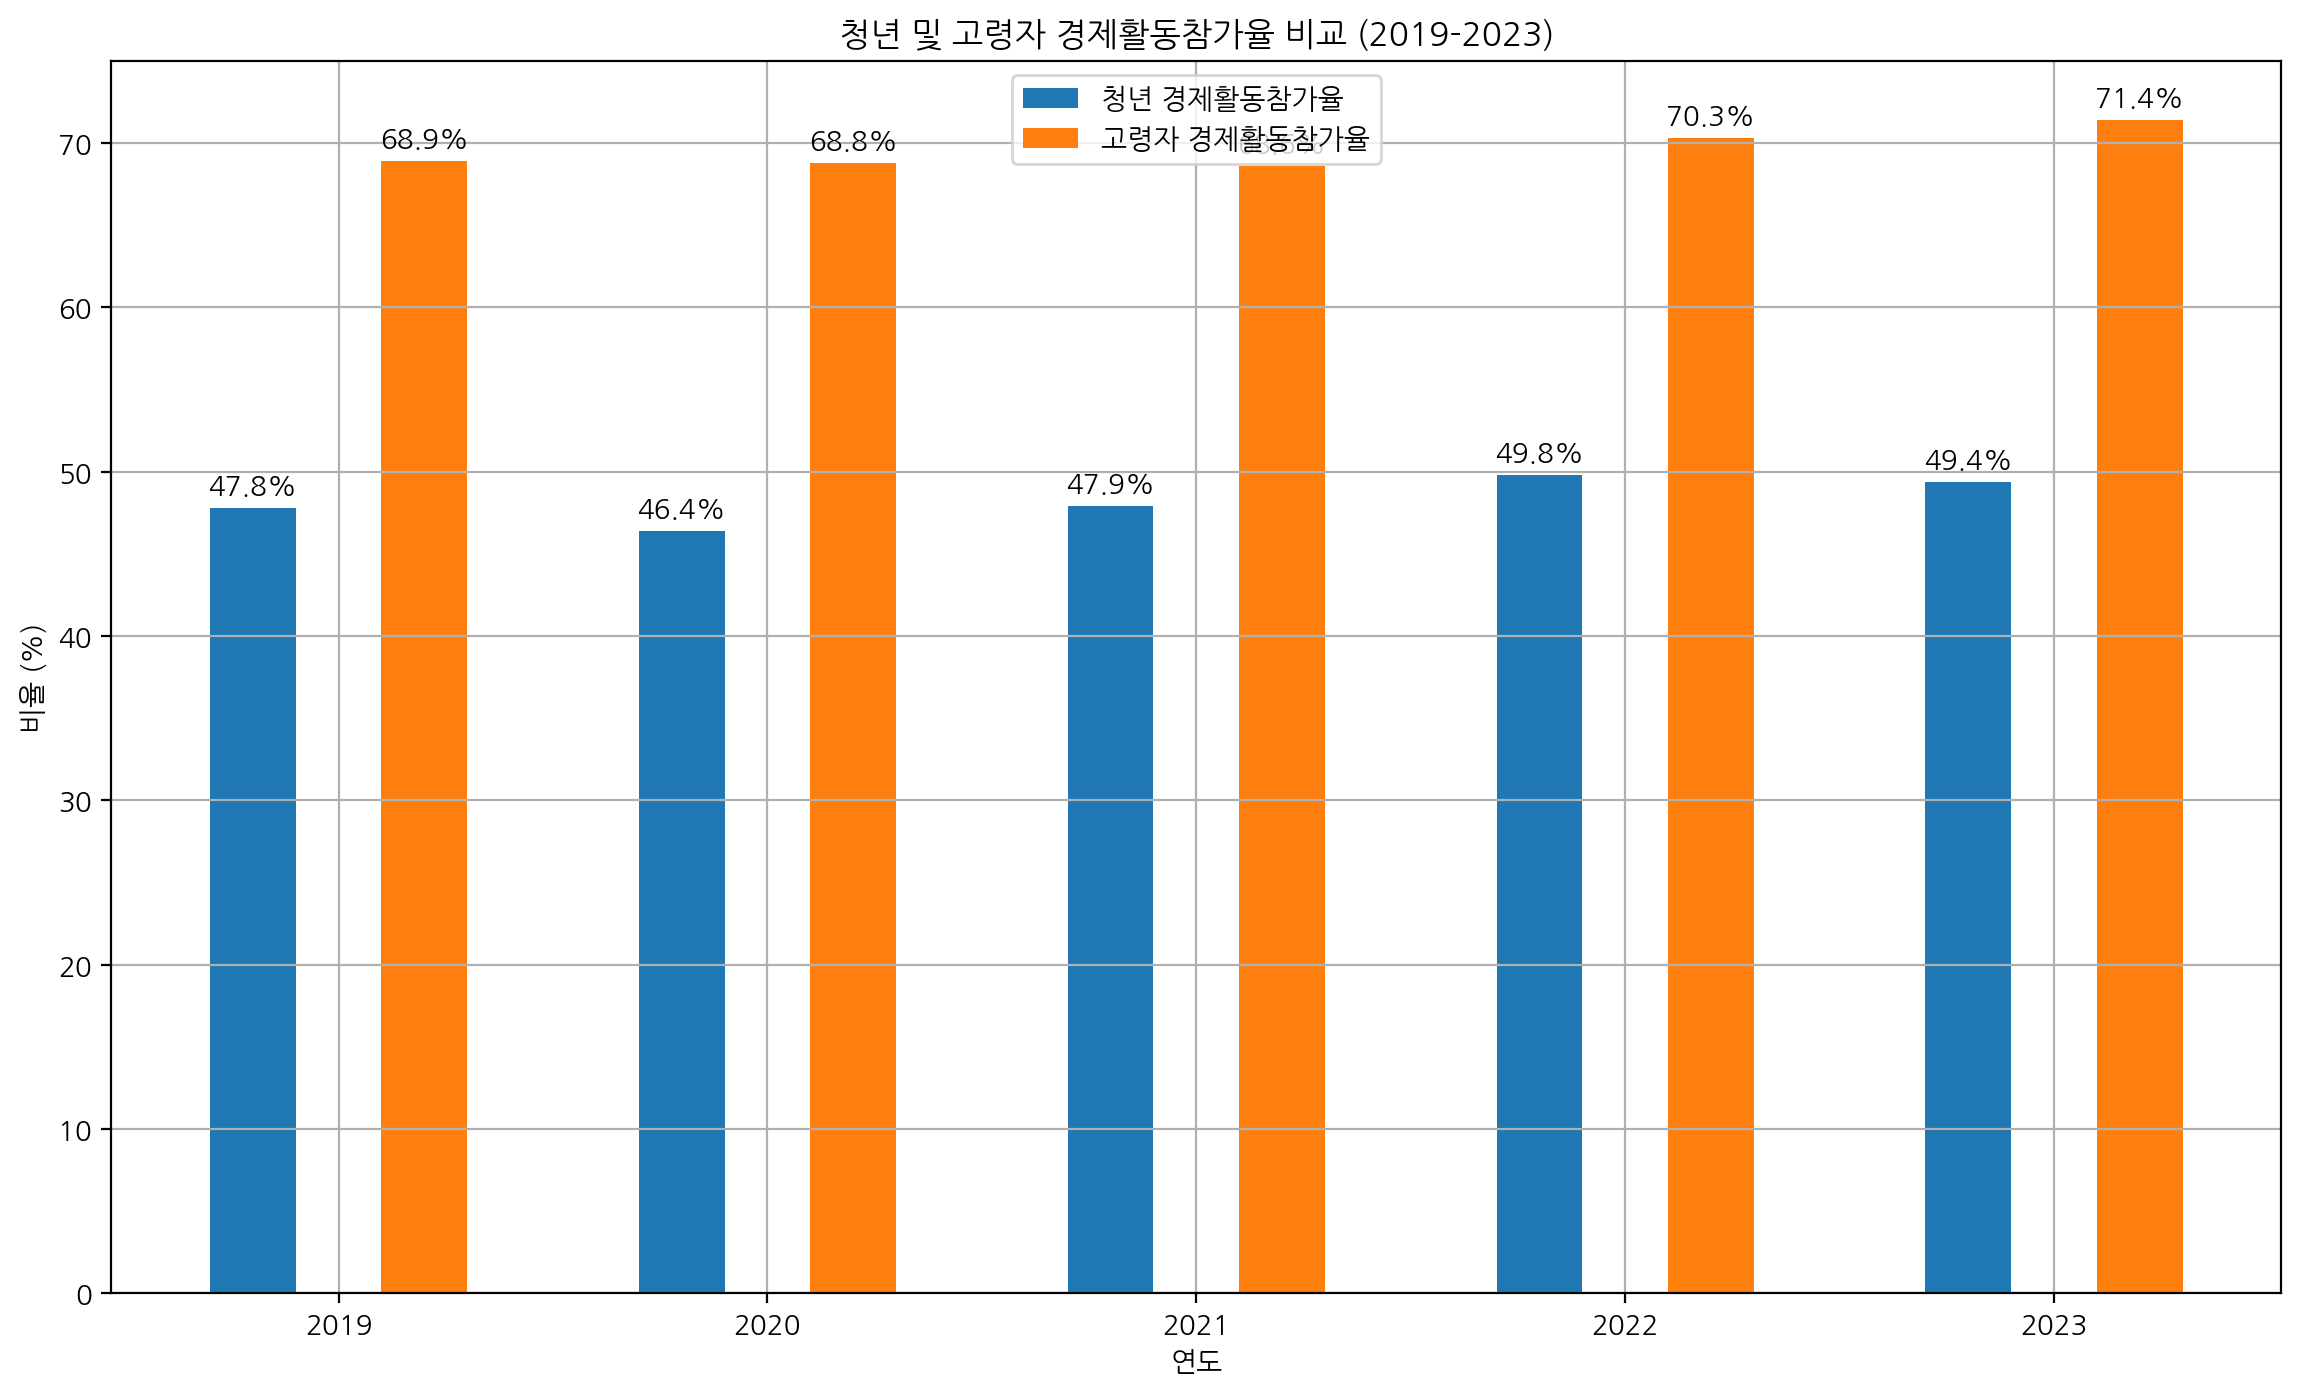

청년 고용률과 실업률의 상관관계:
           고용률       실업률
고용률  1.000000 -0.965725
실업률 -0.965725  1.000000
고령자 고용률과 실업률의 상관관계:
          고용률      실업률
고용률  1.00000 -0.97583
실업률 -0.97583  1.00000


In [ ]:
# 경제활동참가율 추가 분석
fig, ax = plt.subplots(figsize=(14, 8))

bar1 = ax.bar(index - 0.2, df_youth_filtered['경제활동참가율'], bar_width, label='청년 경제활동참가율')
bar2 = ax.bar(index + 0.2, df_elderly_filtered['경제활동참가율'], bar_width, label='고령자 경제활동참가율')

ax.set_xlabel('연도')
ax.set_ylabel('비율 (%)')
ax.set_title('청년 및 고령자 경제활동참가율 비교 (2019-2023)')
ax.set_xticks(index)
ax.set_xticklabels(years)
ax.legend()

add_labels(bar1)
add_labels(bar2)

plt.grid(True)
plt.show()

# 상관 분석
correlation_youth = df_youth_filtered[['고용률', '실업률']].corr()
correlation_elderly = df_elderly_filtered[['고용률', '실업률']].corr()

print("청년 고용률과 실업률의 상관관계:\n", correlation_youth)
print("고령자 고용률과 실업률의 상관관계:\n", correlation_elderly)


#### 청년층과 고령층의 경제활동참가율 변화에서 발견할 수 있는 몇 가지 주요 패턴

1. 경제활동참가율의 일관성: 고령층의 경제활동참가율은 전반적으로 일관된 증가세를 보이는 반면, 청년층의 경제활동참가율은 경제 상황에 따라 변동합니다.

2. 취업 시장 반응: 청년층은 주로 경제 상황에 민감하게 반응하여 경제활동참가율이 변화할 수 있으며, 특히 학업과 취업 준비 기간에 따라 참가율이 달라질 수 있습니다.

3. 고령층의 증가: 고령층의 경제활동참가율이 증가하는 이유는 인구 고령화와 더불어 경제적 필요, 건강 상태, 연금 제도 등의 영향 때문일 수 있습니다.